# Hypothesis Testing

## Objectives

* Carry out hypothesis testing using statistical analysis techniques.

## Navigation:
* [Readme](https://github.com/rmj9000/BankCustomerAttrition/blob/main/README.md)
* [ 01: ETL Pipeline](https://github.com/rmj9000/BankCustomerAttrition/blob/main/jupyter_notebooks/01_etl.ipynb)
* [02: Exploratory Data Analysis](https://github.com/rmj9000/BankCustomerAttrition/blob/main/jupyter_notebooks/02_eda.ipynb)
* [03: Heat Map](https://github.com/rmj9000/BankCustomerAttrition/blob/main/jupyter_notebooks/03_heatmap.ipynb)
* [05: Data Transformation for Tableau](https://github.com/rmj9000/BankCustomerAttrition/blob/main/jupyter_notebooks/05_tableau-data.ipynb)
* [06: Tableau Dashboard](https://public.tableau.com/shared/GMW47YQH9?:display_count=n&:origin=viz_share_link)
* [07: Raw Data](https://github.com/rmj9000/BankCustomerAttrition/blob/main/data/inputs/raw/bank_customer_attrition_insights_data.csv)
* [08: Cleaned Data](https://github.com/rmj9000/BankCustomerAttrition/blob/main/data/inputs/cleaned_bank_data.csv)

## Inputs

* data/inputs/cleaned_bank_data.csv

## Outputs

* data/inputs/cleaned_bank_data.csv (No changes to dataset)

_________________

The cleaned bank customer attrition dataset will be loaded into this notebook for hypothesis testing.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the cleaned dataset
df = pd.read_csv('../data/inputs/cleaned_bank_data.csv')
df.head() # Display the first few rows of the dataset

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned,AgeGroup
0,0,1,15598695,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-49
1,1,2,15649354,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-49
2,2,3,15737556,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-49
3,3,4,15671610,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-39
4,4,5,15625092,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-49


In [5]:
# Drop the 'Unnamed: 0' column if it exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

## **Hypothesis 1:** Using a T-Test

Customers who earn fewer reward points are more likely to attrite.

Reward points often reflect transaction activity and customer engagement. If customers earning fewer points are more likely to leave, it suggests that low engagement is a key driver of attrition. This insight could help the bank identify disengaged customers early and design targeted retention strategies.




In [7]:
# CoPilot Assistance
# Import necessary libraries for hypothesis testing
from scipy.stats import ttest_ind

# Split the dataset into two groups: customers who exited and those who did not
attrited_customers = df[df['Exited'] == 1]['PointEarned']  # Customers who left the bank
retained_customers = df[df['Exited'] == 0]['PointEarned']  # Customers who stayed

# Perform an independent T-Test to compare the mean reward points between the two groups
t_stat, p_value = ttest_ind(attrited_customers, retained_customers, equal_var=False)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Customers who earn fewer reward points are more likely to attrite.")
else:
    print("Fail to reject the null hypothesis: No significant difference in reward points between attrited and retained customers.")

T-Statistic: -0.46372006220720496
P-Value: 0.6428801754239084
Fail to reject the null hypothesis: No significant difference in reward points between attrited and retained customers.


* The T-Test statistic is -0.4637 which indicates there isn't a substantial difference between the means of each variable. 

* The P-Value is 0.642 which is greater than the significance level of 0.05. Indicating there is no statistically significant difference and any variation in values may be down to random chance.

* So we fail to reject the null hypothesis. 

## **Hypothesis 2:** Using a Pearson Correlation 

Credit card customers with lower credit scores are more likely to attrite.

Lower credit scores may indicate financial instability or limited access to banking services. These customers might leave voluntarily due to dissatisfaction or be targeted for closure by the bank. Understanding this relationship can guide credit policy and customer support strategies.

In [8]:
# CoPilot Assistance
# Import necessary libraries
from scipy.stats import pearsonr

# Perform a correlation analysis between CreditScore and Exited
correlation, p_value = pearsonr(df['CreditScore'], df['Exited'])

# Display the results
print("Correlation Coefficient:", correlation)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between credit scores and attrition.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between credit scores and attrition.")

Correlation Coefficient: -0.026771448055269292
P-Value: 0.007422037242741072
Reject the null hypothesis: There is a significant correlation between credit scores and attrition.


* The correlation coefficent is -0.0268 which indicates there is a weak negative correlation between Credit Score and Attrition. 

* The P-Value is 0.0074 which is less than the significance level, suggesting the correlation is statistically significant. 

* Reject the null hypothesis as there is a statistically significant, although weak negative correlation between the two variables. Suggesting a relationship exists but credit score alone is unlikely to be a strong predictor of attrition. 

Use a logistic regression to model the relationship between Credit Score and Attrition.

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
X = df[['CreditScore']]  # Predictor variable
y = df['Exited']         # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8053333333333333
Confusion Matrix:
 [[2416    0]
 [ 584    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/Users/kabirasharpe/dev/final_hackathon/BankCustomerAttrition/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kabirasharpe/dev/final_hackathon/BankCustomerAttrition/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kabirasharpe/dev/final_hackathon/BankCustomerAttrition/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Plot the results of the logistic regression using a scatter plot that shows a trend line.

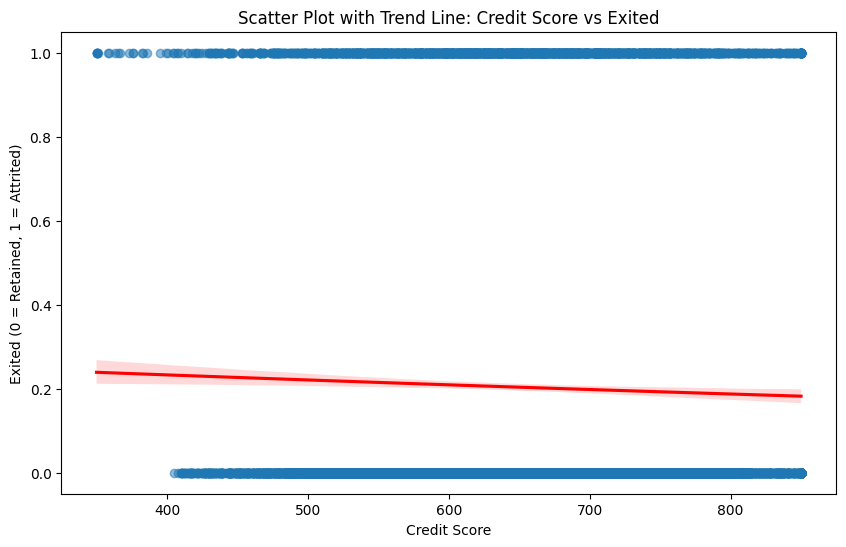

In [15]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='CreditScore', y='Exited', data=df, logistic=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Exited (0 = Retained, 1 = Attrited)')
plt.title('Scatter Plot with Trend Line: Credit Score vs Exited')

# Show the plot
plt.show()

**Trend Line:** The red trend line shows a weak negative relationship between Credit Score and Attrition. As Credit Score increases, the likelihood of attrition (Exited = 1) slightly decreases.

**Scatter Points:** The points are clustered at Exited = 0 (retained customers) and Exited = 1 (attrited customers), indicating the binary nature of the target variable. There is significant overlap between the two groups across the range of Credit Score, suggesting that Credit Score alone may not be a strong predictor of attrition.

**Implication:** The weak negative correlation aligns with the earlier Pearson correlation results (Correlation Coefficient = -0.0268).

While there is a statistically significant relationship, the effect size is small, meaning other factors (e.g., satisfaction score, activity level) may better explain attrition.

## **Hypothesis 3:** Using a Mann-Whitney U Test

Customers with shorter tenure at the bank are more likely to attrite.

If newer customers are more prone to leaving, it may signal issues with onboarding, early experience, or unmet expectations. This insight is crucial for improving customer retention strategies during the first few months of engagement

In [9]:
# CoPilot Assistance
# Import necessary libraries for hypothesis testing
from scipy.stats import mannwhitneyu

# Split the dataset into two groups: customers who exited and those who did not
attrited_customers = df[df['Exited'] == 1]['Tenure']  # Customers who left the bank
retained_customers = df[df['Exited'] == 0]['Tenure']  # Customers who stayed

# Perform the Mann-Whitney U Test to compare the tenure between the two groups
u_stat, p_value = mannwhitneyu(attrited_customers, retained_customers, alternative='two-sided')

# Display the results
print("U-Statistic:", u_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Customers with shorter tenure at the bank are more likely to attrite.")
else:
    print("Fail to reject the null hypothesis: No significant difference in tenure between attrited and retained customers.")

U-Statistic: 7955556.0
P-Value: 0.1729583374544681
Fail to reject the null hypothesis: No significant difference in tenure between attrited and retained customers.


* The U-Statistic is 7955556.0, which suggests the two groups overlap significantly meaning there is little difference between them. 

* The P-Value is 0.1729 which greater than the significance level. Indidcating the observed difference between Tenure and Attrition is not statistically significant. 

* Fail to reject the null hypothesis as no statistical significance. 

Plot a box plot to visualise the distribution of retained customers vs. attrited customers based on their tenure.

/var/folders/64/xbfmq1f95ys8zppkq460lv_80000gn/T/ipykernel_8545/3128407085.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Tenure', data=df, palette=['blue', 'red'])


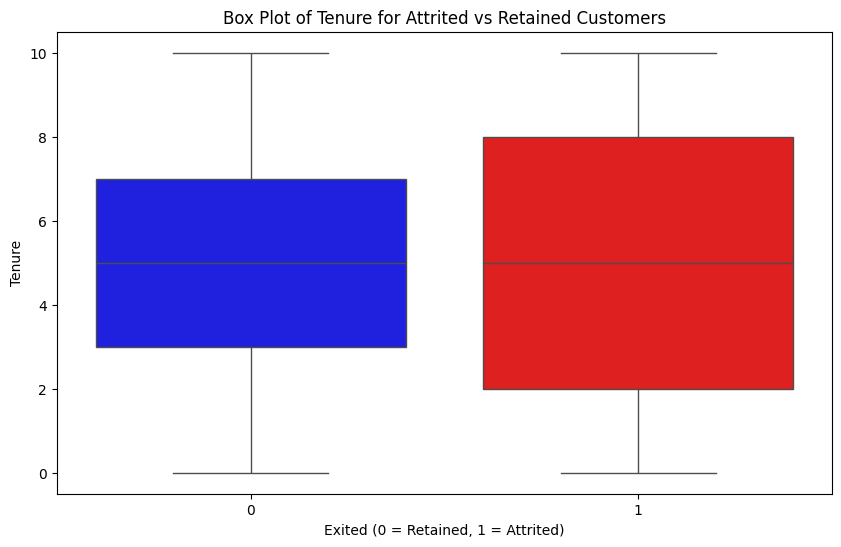

In [13]:
# CoPilot code creation
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize tenure distribution for attrited and retained customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, palette=['blue', 'red'])

# Add labels and title
plt.xlabel('Exited (0 = Retained, 1 = Attrited)')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure for Attrited vs Retained Customers')

# Show the plot
plt.show()

**Median Tenure:** The median tenure for both attrited (red) and retained (blue) customers appears similar, suggesting no significant difference in central tendency.

**Spread:** Both groups show a similar range of tenure values, indicating comparable variability.

**Outliers:** There are no extreme outliers visible in either group.

**Implication:** The box plot supports the statistical test results, showing no clear distinction in tenure between attrited and retained customers. Tenure may not be a strong predictor of attrition.